# 数据提取与处理

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
def plt_show(img):
    plt.imshow(img,cmap="gray")
    plt.show()

In [3]:
def read_directory(directory_name):
    faces_addr = []
    for filename in os.listdir(directory_name):
        faces_addr.append(directory_name + '/' + filename)
    return faces_addr

In [4]:
faces = []
for i in range(1,42):
    faces_addr = read_directory("./att_faces/s"+str(i))
    for addr in faces_addr:
        faces.append(addr)

In [5]:
images = []
labels = []
for index,face in enumerate(faces):
    image = cv2.imread(face,0)
    images.append(image)
    labels.append(int(index/10+1))

print(len(labels))
print(len(images))
print(type(images[0]))
print(labels)

410
410
<class 'numpy.ndarray'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 2

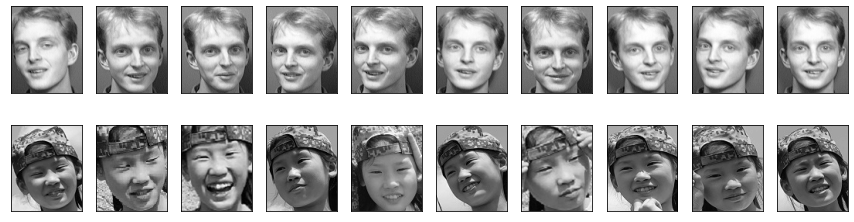

In [6]:
fig,axes = plt.subplots(2,10,figsize=(15,4)
                       ,subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i+390],cmap="gray")

# PCA降低维度

In [7]:
image_data = []
for image in images:
    data = image.flatten()
    image_data.append(data)
    
print(image_data[0].shape)

(10304,)


In [8]:
image_data

[array([42, 41, 44, ..., 42, 43, 41], dtype=uint8),
 array([44, 43, 32, ..., 43, 43, 37], dtype=uint8),
 array([48, 49, 45, ..., 47, 46, 46], dtype=uint8),
 array([34, 34, 33, ..., 37, 40, 33], dtype=uint8),
 array([63, 53, 35, ..., 41, 10, 24], dtype=uint8),
 array([64, 76, 80, ..., 35, 37, 39], dtype=uint8),
 array([ 43,  50,  41, ..., 158, 153, 169], dtype=uint8),
 array([39, 44, 53, ..., 29, 26, 29], dtype=uint8),
 array([41, 47, 47, ..., 35, 37, 38], dtype=uint8),
 array([60, 60, 62, ..., 32, 34, 34], dtype=uint8),
 array([ 43,  39,  36, ..., 154, 155, 141], dtype=uint8),
 array([ 34,  39,  35, ..., 135, 138, 148], dtype=uint8),
 array([ 35,  36,  37, ..., 144, 147, 143], dtype=uint8),
 array([ 37,  34,  38, ..., 135, 143, 133], dtype=uint8),
 array([34, 36, 35, ..., 32, 25, 25], dtype=uint8),
 array([35, 32, 36, ..., 25, 28, 29], dtype=uint8),
 array([34, 35, 35, ..., 31, 24, 24], dtype=uint8),
 array([30, 37, 35, ..., 26, 27, 32], dtype=uint8),
 array([ 38,  35,  36, ..., 138, 1

In [9]:
x = np.array(image_data)
y = np.array(labels)
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(410, 10304)


In [10]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [11]:
import pandas as pd
data = pd.DataFrame(x)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,42,41,44,46,48,39,37,37,33,37,...,42,33,39,39,40,41,43,42,43,41
1,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
2,48,49,45,47,49,57,39,42,53,49,...,39,44,40,41,49,42,44,47,46,46
3,34,34,33,32,38,40,39,49,54,57,...,42,44,38,30,37,30,36,37,40,33
4,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
pca = PCA(n_components=100)
pca.fit(x_train)

PCA(n_components=100)

In [14]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(328, 100)
(82, 100)


In [15]:
v = pca.components_
v.shape

(100, 10304)

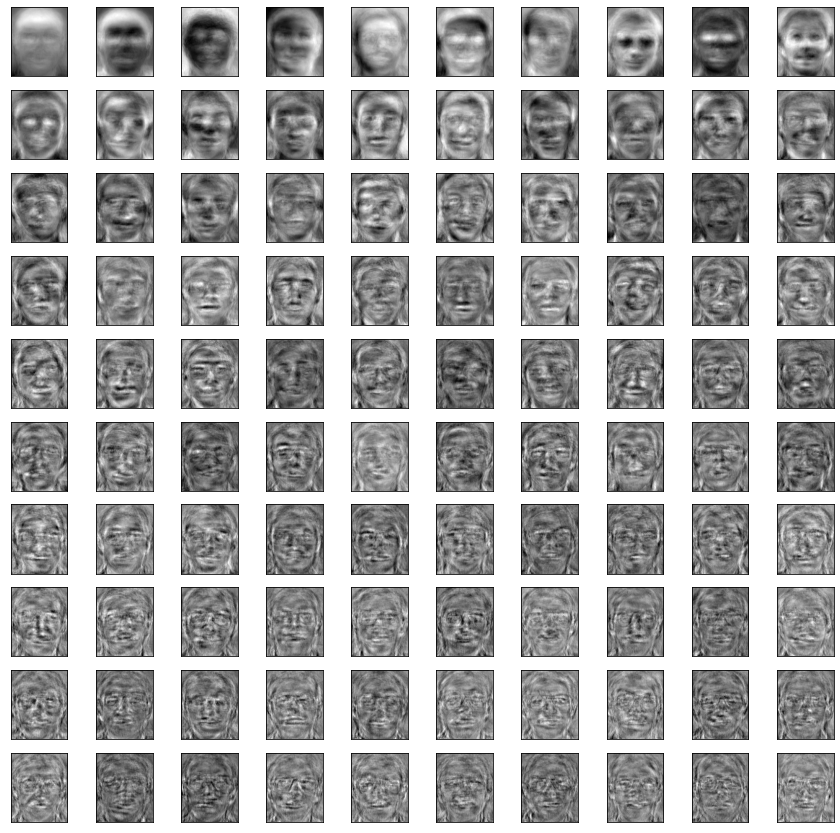

In [16]:
fig,axes = plt.subplots(10,10,figsize=(15,15)
                       ,subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(112,92),cmap="gray")

In [17]:
# 改选择多少个特征呢？
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.16568061, 0.12112931, 0.08931743, 0.05579875, 0.04699077,
       0.03335457, 0.0261286 , 0.02309956, 0.02108152, 0.01744293,
       0.01424236, 0.01318413, 0.01188963, 0.01070004, 0.01033909,
       0.00934731, 0.00880451, 0.00852356, 0.00757552, 0.00732556,
       0.00697302, 0.0068484 , 0.00627934, 0.00606152, 0.00536644,
       0.00509621, 0.00495414, 0.00490393, 0.00467665, 0.00454926,
       0.00449428, 0.00432875, 0.00414252, 0.00398864, 0.00384583,
       0.00371291, 0.00359439, 0.00340802, 0.00326537, 0.00325478,
       0.00317048, 0.00314205, 0.00304868, 0.00297897, 0.0028651 ,
       0.00269635, 0.00269108, 0.00265979, 0.00249861, 0.00246832,
       0.00243307, 0.0023683 , 0.00231991, 0.00223729, 0.00219662,
       0.00215919, 0.00213852, 0.0020909 , 0.00206687, 0.00201213,
       0.00196901, 0.00191361, 0.00187581, 0.00183332, 0.00179255,
       0.00177209, 0.0017578 , 0.00166635, 0.00164963, 0.00163372,
       0.00161669, 0.00158591, 0.00152716, 0.00151753, 0.00149

In [18]:
# 返回特征所携带的数据是原始数据的多少
pca.explained_variance_ratio_.sum()

0.9019703286057403

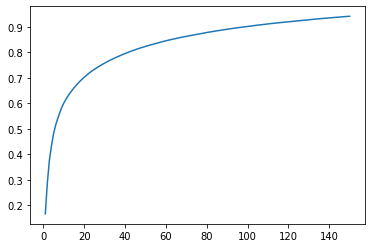

In [19]:
# 画出特征个数和所携带信息数的曲线图
explained_variance_ratio = []
for i in range(1,151):
    pca = PCA(n_components=i).fit(x_train)
    explained_variance_ratio.append(pca.explained_variance_ratio_.sum())
plt.plot(range(1,151),explained_variance_ratio)
plt.show()

# 使用OpenCV的EigenFace算法进行识别

原理：将训练集图像和测试集图像都投影到特征向量空间中，再使用聚类方法（最近邻或k近邻等）得到里测试集中的每个图像最近的图像，进行分类即可。

cv2.face.EigenFaceRecognizer_create()创建人脸识别的模型，通过图像数组和对应标签数组来训练模型

predict()函数进行人脸预测，该函数会返回两个元素的数组

第一个是识别个体的标签，
第二个是置信度，越小匹配度越高，0表示完全匹配。
getEigenValues() 获得特征值

getEigenVectors() 特征向量

getMean() 均值

In [20]:
import cv2
model = cv2.face.EigenFaceRecognizer_create()
model.train(x_train,y_train)

In [21]:
res =model.predict(x_test[0])
print(res)

(37, 1980.8340365129438)


In [22]:
y_test[0]

37

In [25]:
ok = 0
for i in range(len(y_test)):
    res = model.predict(x_test[i])
    if y_test[i] == res[0]:
        ok = ok + 1
print("准确率:%.2f"%(ok/len(y_test)))

准确率:0.98


In [36]:
y_pred = np.array([ model.predict(x_test[i])[0] for i in range(len(y_test))])
y_pred

array([37, 39,  5, 36,  7, 30,  5,  6, 12, 32, 39, 22, 33,  9, 20, 20, 18,
       16, 18, 27, 24, 17, 32, 21, 10, 17,  1, 21, 32, 35,  9, 19,  8, 31,
        6, 19, 31, 40, 17, 23,  7, 15, 31, 20,  2, 11, 19, 27,  2, 24, 38,
       21, 15, 24,  1, 20, 26, 36, 23,  4, 30, 29, 39, 38, 31, 18, 13, 25,
       31, 23, 39, 38, 34, 15,  5, 38, 16, 41, 14, 14,  8, 10])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00    

In [38]:
mean = model.getMean()
print(mean)

[[87.38414634 87.31097561 87.80792683 ... 77.63109756 77.16463415
  76.30182927]]


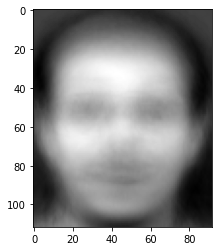

In [39]:
meanFace = mean.reshape(112,92)
plt_show(meanFace)

# 自定义图片测试

In [40]:
pca=PCA(n_components=100)
pca.fit(x)
x = pca.transform(x)

In [41]:
model = cv2.face.EigenFaceRecognizer_create()
model.train(x,y)

In [42]:
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()

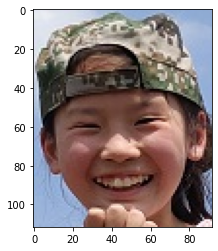

(112, 92, 3)


In [43]:
img = cv2.imread('./att_faces/test.jpg')
plt_show0(img)
print(img.shape)

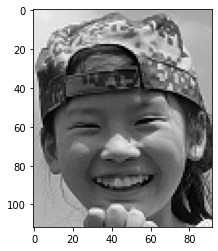

In [44]:
# 灰度处理
img = cv2.imread('./att_faces/test.jpg',0)
plt_show(img)
imgs = []
imgs.append(img)

In [45]:
image_data = []
for img in imgs:
    data = img.flatten()
    image_data.append(data)

In [46]:
test = np.array(image_data)
test.shape

(1, 10304)

In [47]:
test = pca.transform(test)
test[0].shape

(100,)

In [49]:
res = model.predict(test)
res

(41, 4272.300524646804)